# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here

In [1]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# Write your code here

__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [6]:
# Write your code here

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [2]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [3]:
import numpy as np 
import pandas as pd
from datetime import datetime
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

ori_bikes = pd.read_json(BIKES_DATA_FOLDER+"/metro-bike-share-trip-data.json.zip",compression="zip")
normal_ori_bikes = ori_bikes[ori_bikes["Passholder Type"]!="Staff Annual"].reset_index()
data_bikes = normal_ori_bikes.dropna(how="any")
nan_vals = normal_ori_bikes.iloc[list(set(normal_ori_bikes.index)-set(data_bikes.index))]

print ("%d staff trips, %d missing info trips"%(ori_bikes[ori_bikes["Passholder Type"]=="Staff Annual"].shape[0],
                                               len(nan_vals)))
print("Total number of trips: %d" %ori_bikes.shape[0])

382 staff trips, 1330 missing info trips
Total number of trips: 132427


In [5]:
data_bikes["Bike ID"] = data_bikes["Bike ID"].astype("int")
data_bikes["Starting Station ID"] = data_bikes["Starting Station ID"].astype("int")
data_bikes["Ending Station ID"] = data_bikes["Ending Station ID"].astype("int")
data_bikes["Plan Duration"] = data_bikes["Plan Duration"].astype("int")
data_bikes["Start Time"] = [datetime.strptime(x,'%Y-%m-%dT%X') for x in data_bikes["Start Time"]]
data_bikes["End Time"] = [datetime.strptime(x,'%Y-%m-%dT%X') for x in data_bikes["End Time"]]
data_bikes.head(2)

,index,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,0,6281,180,2016-07-07 04:20:00,3014,34.05661,-118.23721,Monthly Pass,30,2016-07-07 04:17:00,3014,34.05661,-118.23721,1912818,Round Trip
1,1,6281,1980,2016-07-07 06:33:00,3014,34.05661,-118.23721,Monthly Pass,30,2016-07-07 06:00:00,3014,34.05661,-118.23721,1919661,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [6]:
print("Float Based Variables:")
data_bikes[["Duration",
            "Starting Station Latitude","Starting Station Longitude",
            "Ending Station Latitude","Ending Station Longitude"]].describe(include = "all")

Float Based Variables:


,Duration,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000
mean,1355.489577,34.039217,-118.221174,34.034565,-118.206422
std,4674.172366,0.532694,1.849996,0.652348,2.265617
min,60.000000,0.000000,-118.472832,0.000000,-118.472832
25%,360.000000,34.044170,-118.256980,34.044159,-118.256981
50%,600.000000,34.046822,-118.250954,34.046810,-118.250954
75%,1080.000000,34.050880,-118.241562,34.050480,-118.238810
max,86400.000000,34.064281,0.000000,34.064281,0.000000


In [7]:
print("TimeStamp Based Variables:")
data_bikes[["Start Time","End Time"]].describe()

TimeStamp Based Variables:


,Start Time,End Time
count,130715,130715
unique,96991,89870
top,2016-07-14 11:38:00,2016-08-13 13:42:00
freq,15,14
first,2016-07-07 04:17:00,2016-07-07 04:20:00
last,2017-03-31 23:45:00,2017-04-01 18:15:00


In [8]:
print("Categorical Variables: ")
categorical_vars = ["Trip Route Category","Bike ID","Trip ID","Passholder Type","Ending Station ID","Starting Station ID","Plan Duration"]
for k in categorical_vars:
    data_bikes[k] = data_bikes[k].astype('category') 

data_bikes[categorical_vars].describe()

Categorical Variables: 


,Trip Route Category,Bike ID,Trip ID,Passholder Type,Ending Station ID,Starting Station ID,Plan Duration
count,130715,130715,130715,130715,130715,130715,130715
unique,2,762,130715,3,66,66,3
top,One Way,4727,23732455,Monthly Pass,3005,3069,30
freq,118083,309,1,80517,6245,5059,80517


In [10]:
redundancies = data_bikes[["Duration","Trip Route Category","Plan Duration"]]
data_non_redundant = data_bikes.drop(["Duration","Trip Route Category","Plan Duration"],axis=1)
print("Redundant Columns: ")
print("\t Shape:  %s"%str(redundancies.shape))
print("\t Dtypes : %s"%str(redundancies.dtypes).replace("\n","\n\t\t"))
print("\nNon-Redundant Data: ")
print("\t Shape:  %s"%str(data_non_redundant.shape)) 
print("\t Dtypes : %s"%str(data_non_redundant.dtypes).replace("\n","\n\t\t"))

Redundant Columns: 
	 Shape:  (130715, 3)
	 Dtypes : Duration                  int64
		Trip Route Category    category
		Plan Duration          category
		dtype: object

Non-Redundant Data: 
	 Shape:  (130715, 12)
	 Dtypes : index                                  int64
		Bike ID                             category
		End Time                      datetime64[ns]
		Ending Station ID                   category
		Ending Station Latitude              float64
		Ending Station Longitude             float64
		Passholder Type                     category
		Start Time                    datetime64[ns]
		Starting Station ID                 category
		Starting Station Latitude            float64
		Starting Station Longitude           float64
		Trip ID                             category
		dtype: object


__\* Briefly explain your approach here \*__

Variable descriptions are obtained via the pandas describe methods that is individually applied for each group of variables. It should also be noted that trips corresponding to staff users (0.3% of all trips) were removed as they were assumed not to be fully representative of a regular user behaviour. Furthermore, regular users trips which metadata contained NaN values accounted for 1% of rows in the original dataset and were also subsequently discarded. This preprocessing simplifies further analysis.
There are three redundant columns in the dataset:
    - The duration of the trip which can be estiamted from the starting and ending time of a given trip
    - The trip route category which is "Round Trip" if the starting station IP is identical to the ending station one and "One Way" else
    - The plan duration which can be directly infered from the passholder type attribute

Keeping redundant data increases needlessly the total size of the dataset and the risk of having inconsistencies in the data (for instance if the trip duration doesn't exactly match the time difference between the ending and starting time of the trip). These inconsistencies can nonetheless be helpful for identifying faulty or unreliable portions of the dataset. 

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

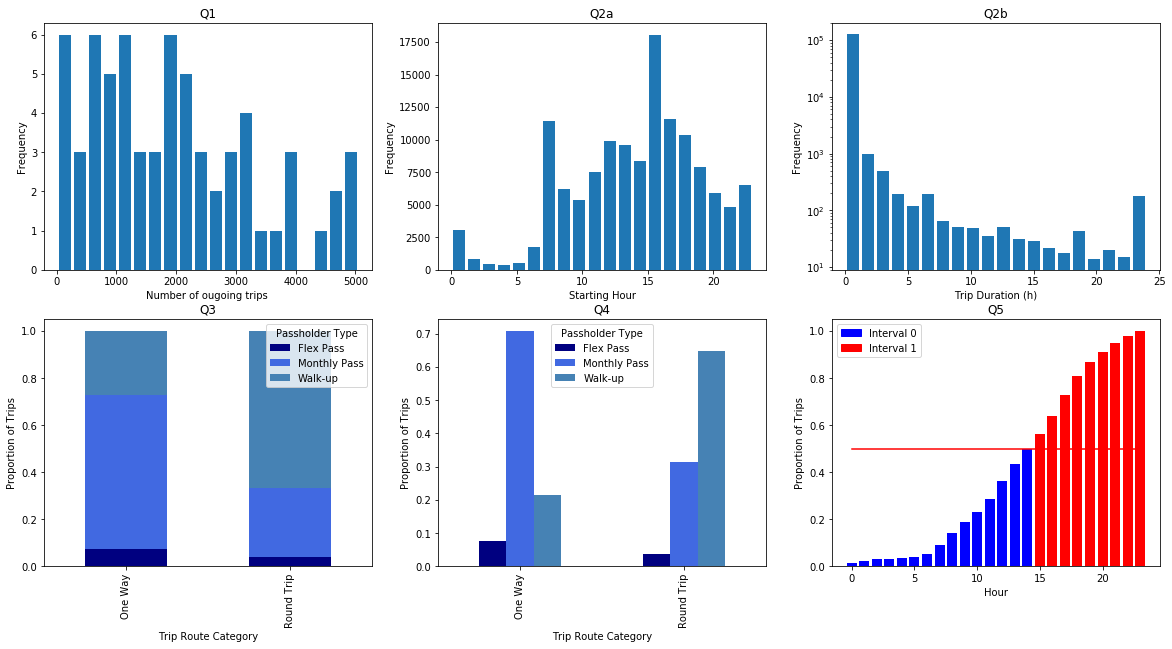

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

% matplotlib inline

colors= ["navy","royalblue","steelblue","lightsteelblue"]
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

axes[0,0].hist(list(Counter(data_bikes["Starting Station ID"]).values()),bins=20,rwidth = 0.8);
axes[0,0].set_xlabel("Number of ougoing trips ");
axes[0,0].set_ylabel("Frequency");
axes[0,0].set_title("Q1");

time_start = [x.hour for x in data_bikes["Start Time"]]
axes[0,1].hist(time_start,bins=20,rwidth = 0.8);
axes[0,1].set_xlabel("Starting Hour");
axes[0,1].set_ylabel("Frequency");
axes[0,1].set_title("Q2a");

durations = data_bikes["Duration"]//3600
axes[0,2].hist(durations,bins=20,rwidth = 0.8,log=True);
axes[0,2].set_xlabel("Trip Duration (h)");
axes[0,2].set_ylabel("Frequency");
axes[0,2].set_title("Q2b");

x = (data_bikes.groupby(["Trip Route Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack().plot(kind='bar',stacked=True, color=colors, grid=False,ax=axes[1,0]);
axes[1,0].set_ylabel("Proportion of Trips");
axes[1,0].set_title("Q3");

noon = 12
x = (data_bikes[[x.hour < noon for x in data_bikes["Start Time"]]].groupby(["Trip Route Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
)
x.unstack().plot(kind='bar',stacked=False, color=colors, grid=False,ax=axes[1,1]);
axes[1,1].set_ylabel("Proportion of Trips");
axes[1,1].set_title("Q4");

sta_hr = Counter([x.hour for x in data_bikes["Start Time"]])
red_patch = mpatches.Patch(color='red', label='Interval 1')
blue_patch = mpatches.Patch(color='blue', label='Interval 0')

df = pd.DataFrame.from_dict(list(sta_hr.items()))
df.columns = ['Hour', 'Trips']
df.set_index('Hour',inplace=True)
df.sort_index(inplace=True)
new_df = (df.cumsum()/df.sum()).reset_index()
axes[1,2].bar(new_df.Hour,new_df.Trips,color = ["red" if k>14 else "blue"for k in range(24)  ]);
axes[1,2].plot([0,23],[0.5,0.5],"red")
axes[1,2].set_xlabel("Hour");
axes[1,2].set_ylabel("Proportion of Trips");
axes[1,2].legend(handles=[blue_patch,red_patch]);
axes[1,2].set_title("Q5");

In [12]:
hour_threshold = 14
data_bikes["Hour Category"] = [int(x.hour<=hour_threshold) for x in data_bikes["Start Time"]]
x = (data_bikes.groupby(["Trip Route Category","Hour Category","Passholder Type",])).size().groupby(level=0).apply(
    lambda x:  x / x.sum()
).unstack()
x.div(x.sum(axis=1), axis=0)


Passholder Type                    Flex Pass  Monthly Pass   Walk-up
Trip Route Category Hour Category                                   
One Way             0               0.074338      0.641012  0.284650
                    1               0.077657      0.660005  0.262339
Round Trip          0               0.034891      0.273612  0.691496
                    1               0.041422      0.311747  0.646832

__\* Briefly explain your approach for every query here \*__

__Q1:__ We compute the distribution of the number of outgoing trips from each station by plotting the histogram of the number of trips for each given station ID (which uniquely identifies each station). We see that outgoing traffic is not distributed homogeneously across stations as the bottom 30% of all stations accumulates 1% of all otugoing trips while the top 30% accumulates 73% of all trips (see <a id='App_2.1'>Appendix 2.1</a>)

__Q2: Trip starting hour:__ The distribution of the number of starting trips per hour of the day clearly shows a circadian pattern that closely follows known daily human activity patterns  with low activity recorded during night-time and increasingly high activity from morning to afternoon hours. Several interesting discontinuities are worth noticing: First, the peak between 7 and 8 AM clearly shows bike users using the bikes to go to work/study as the peak dies out immediately after 8 AM. The gradual increase in number of trips until noon reveals people moving from their work to lunch sites other reasons can be considered. The highest peak in usage is recorded between 4 and 5 PM when people are likely to be leaving their workplace and take the bike for doing so. Interestingly, some people apparently chose to use the bike only in the afternoon and not in  the morning as the difference between the two aforementioned peaks suggests. Finally, it is also worth noticing the increase of usage during late night (11 -12 PM) when users are likely to have used the bike system to return home from places of leisure. A closer study of the distance from a user's home location might give a better insight on what users are taking the bikes for. 

__Q2: Duration:__ We immediately notice that the duration distribution is clearly a power-law with most (>99%) trips lasting less than an hour. This can be understood through the most frequent usage plans seen in the dataset (Monthly Pass, around 60 % and Walk up Pass at around 31% of all subscriptions observed) for which all rides lasting 30 minutes or less are free (over that duration, a [charge](https://bikeshare.metro.net/pricing/) is applied to the user ). The peak corresponding to the 24h duration is explained by the fact that trip lengths are capped at 24 hours as detailed [here](https://bikeshare.metro.net/about/data/).


__Q3:__ In order to compute the sought stack barplot, we group the dataframe by both categories under study and the compute the proportion of trips for each of the categories.

__Q4:__ When considering only trips beginning before noon, we see that flex pass users are the least represented users when considering both one-way and round trips. We also notice that the before noon user composition changes depending on whether each of the aforementioned trips is considered: users with monthly passes are more prone to perform one-way trips that users with walk-up passes while conversely users with walk-up passes are the likeliest ones to do round-trips. This actually provides a nice insight on what each suscription mode is supposed to be used for: montly passes  are generally used for daily routines such as home to work and work to home trips as well as general movement around the city where the user will spend some time at his target location. Walk-up passes are probably meant for sightseeing and thus users relying on them tour a given location with the city bikes and end the trip at the same station they started it from. 

__Q5:__ The hour used to separate both intervals is chosen based on the cumulative distribution of user trips (see plot Q5 above): it corresponds the bin closest to the median of the distribution (red line) and is set at 2 PM. By computed the sought statistics, we observe proportions vary roughy from 0.3% to 5% depending on whether trips from the irst or second hour interval are considered. Regarding the proposed paying scheme, we observe that monthly pass users are 2 to 4 % more represented from the first to the second hour interval so we may argue that there is some sense in introducing such a scheme. However, it is worth recalling that such a pricing difference would affect only trips lasting more than 30 minutes (since up until then the cost of the trip is none). Since less than 4% of all trips made my monthly pass users last more than 30 minutes (see <a id='App_2.2'>Appendix 2.2</a>) it seems unnecessary to modify the pricing scheme.

# Appendix

[]((#App_2.1)

## Question 1 

Bottom 30% accumulates 1% of all trips
Top 30% accumulates 73% of all trips


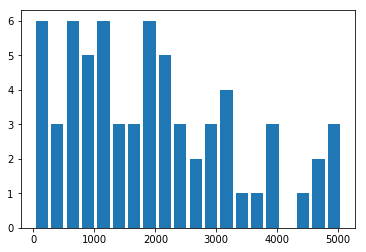

In [13]:
nb_stat,nb_trips,_ = plt.hist(list(Counter(data_bikes["Starting Station ID"].dropna(how="any")).values()),bins=20,rwidth = 0.8);
cum_nb_stat = np.cumsum(nb_stat)
bott,top=3,10
print("Bottom %d%% accumulates %d%% of all trips"%(100*(cum_nb_stat[bott])/np.sum(nb_stat),100*np.sum(nb_trips[:bott])/np.sum(nb_trips)))
print("Top %d%% accumulates %d%% of all trips"%(100*np.sum(nb_stat[-top:])/np.sum(nb_stat),100*np.sum(nb_trips[-top:])/np.sum(nb_trips)))


[]((#App_2.5)

## Question 5

In [14]:
durations = data_bikes["Duration"][data_bikes["Passholder Type"]=="Monthly Pass"]//60
print ("%.2f %% of al montly users use the bikes for more than 30 minutes"%(np.sum(durations>30)/len(durations)*100))

3.27 % of al montly users use the bikes for more than 30 minutes
